# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

In [1]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree (you can use decision tree implementation from existing libraries).

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [3]:
feature_cols = data.columns.tolist().remove('Diagnosis')
X = data.loc[:, data.columns != 'Diagnosis']
y = data['Diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [5]:
d_tree_basic = DecisionTreeClassifier(random_state = 42)

d_tree_basic = d_tree_basic.fit(X_train,y_train)

y_pred = d_tree_basic.predict(X_test)

In [6]:
print("Default Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Default Tree Accuracy: 0.9619047619047619


In [7]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

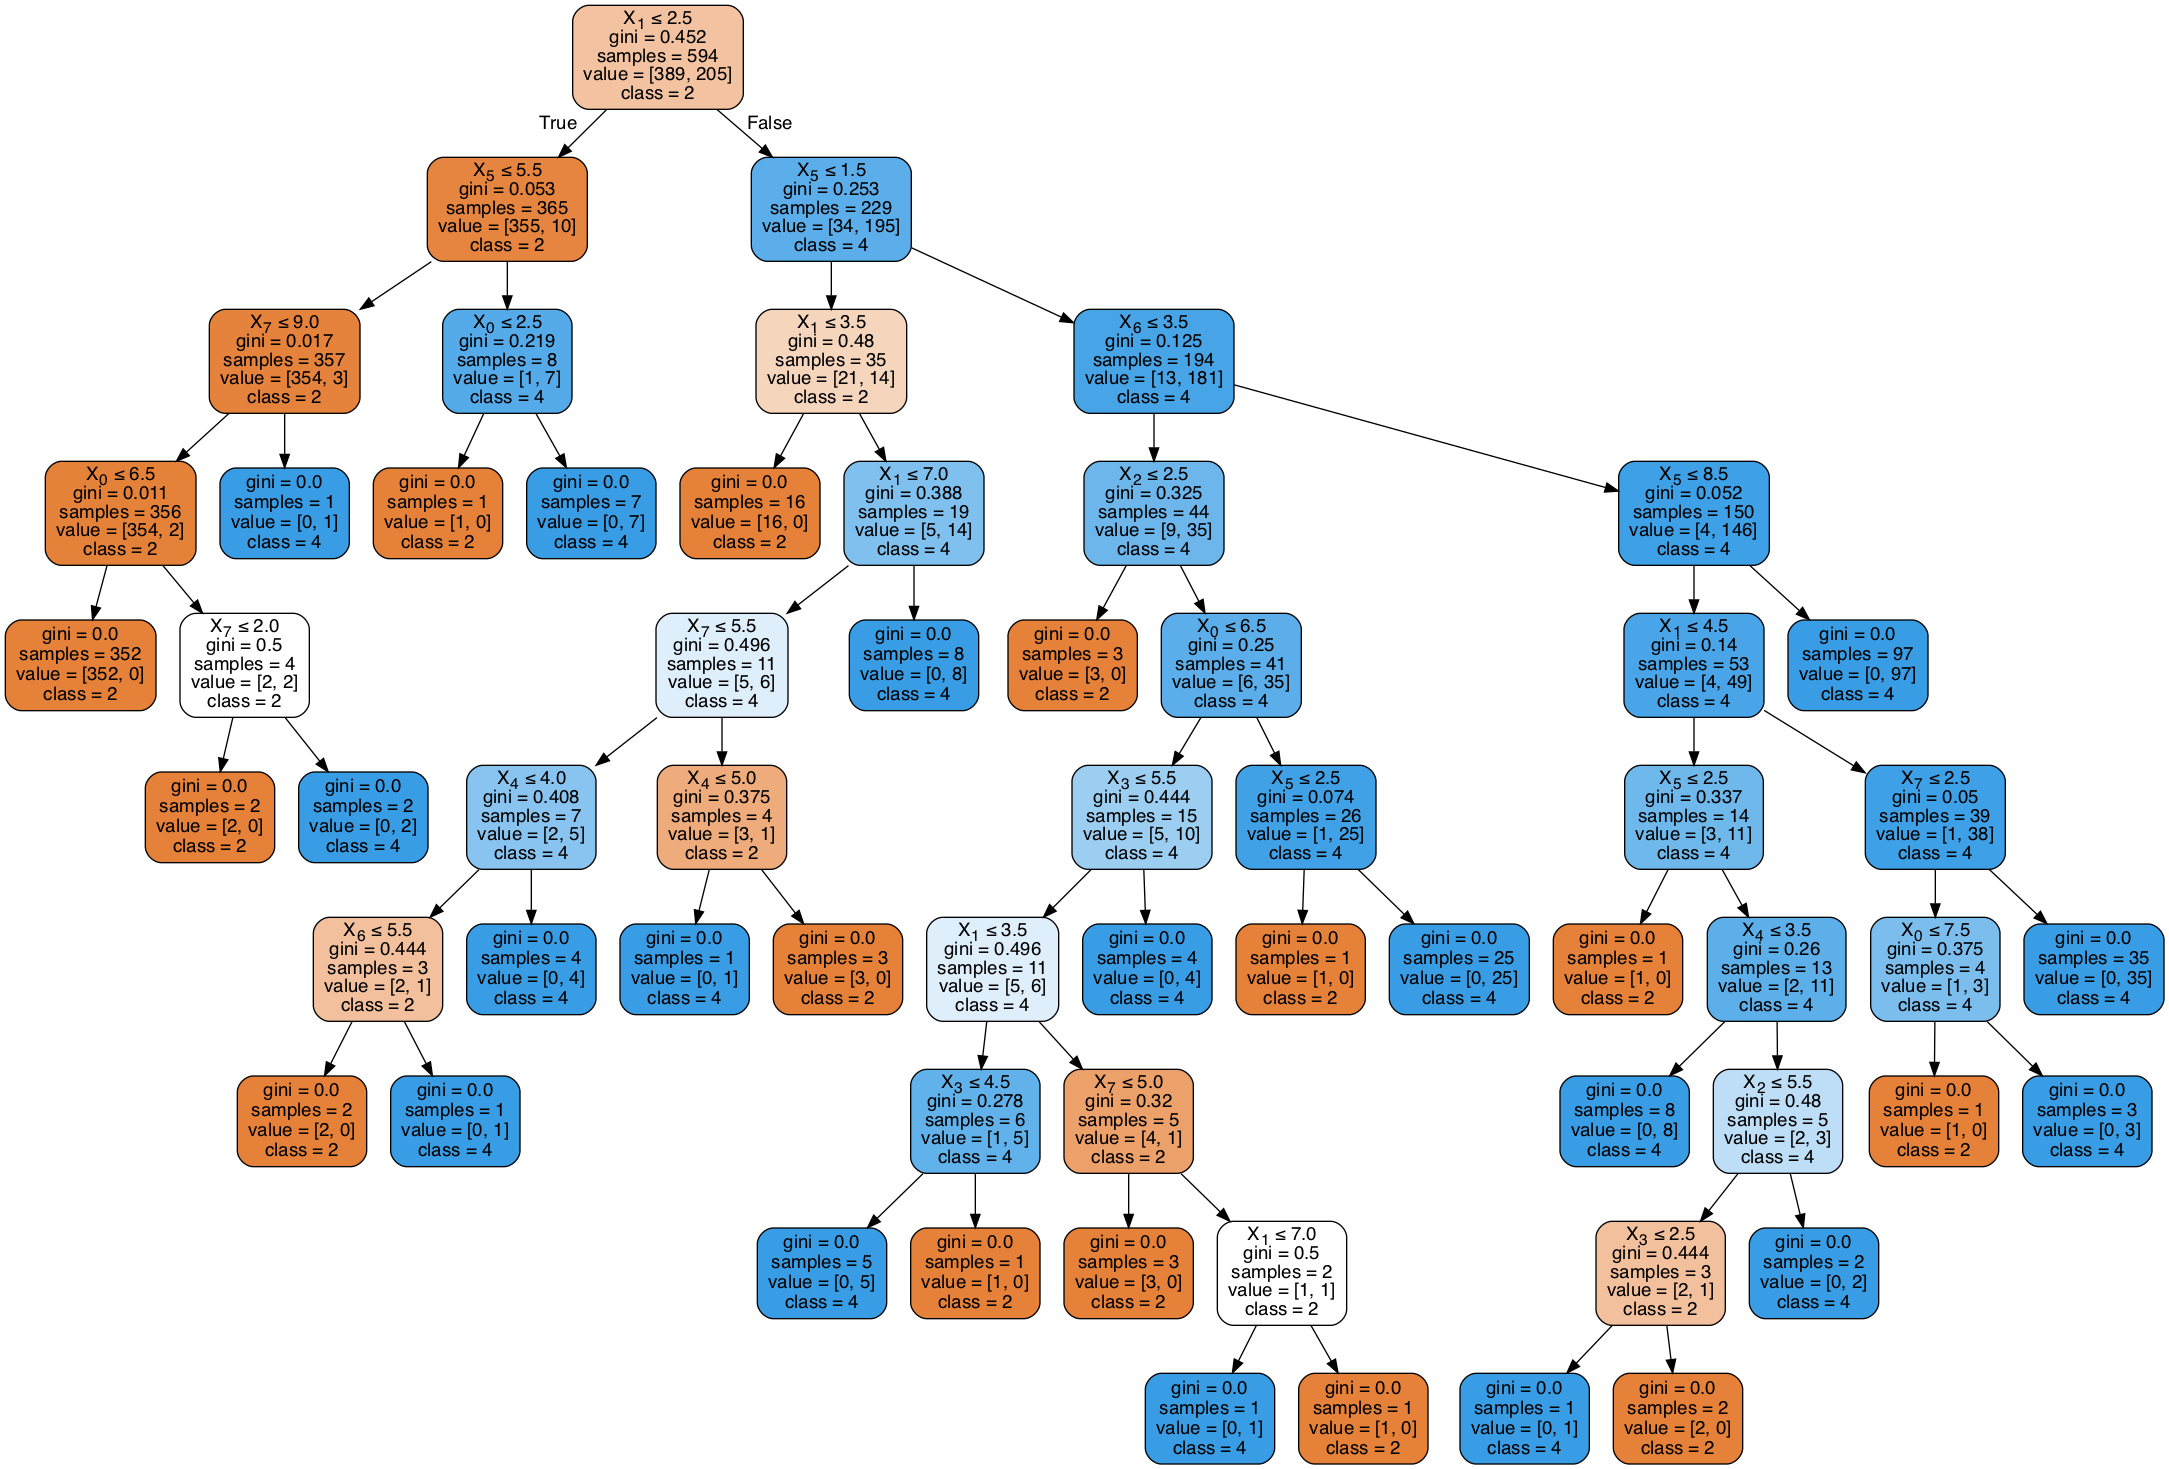

In [8]:
dot_data = StringIO()
export_graphviz(d_tree_basic, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [9]:
d_tree_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 42)

d_tree_entropy = d_tree_entropy.fit(X_train,y_train)

In [10]:
d_tree_gini = DecisionTreeClassifier(criterion="gini", random_state = 42)

d_tree_gini = d_tree_gini.fit(X_train,y_train)

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [11]:
y_pred = d_tree_entropy.predict(X_test)

print("Entropy Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Entropy Tree Accuracy: 0.9238095238095239


In [12]:
y_pred = d_tree_gini.predict(X_test)

print("Gini Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Gini Tree Accuracy: 0.9619047619047619


**We can see that Gini criterion performs much better in comparision to Entropy criterion**

1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches. 

* Applying grid search using criterion and max depth as parameters to check.

In [13]:
parameters = {'criterion':['entropy', 'gini'], 'max_depth':[2, 3, 4, 5, 6, 7, 8]}
tree = DecisionTreeClassifier(random_state=42)
d_tree_grid = GridSearchCV(tree, parameters)

d_tree_grid.fit(X_train,y_train)
# pprint(d_tree_grid.cv_results_)
print('Best Params:', d_tree_grid.best_params_)
print('Best Score:', d_tree_grid.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 5}
Best Score: 0.9478279447372169


In [14]:
d_tree_best = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state = 42)

d_tree_best.fit(X_train,y_train)

y_pred = d_tree_best.predict(X_test)

print("Best tree according to grid serach accuracy:",metrics.accuracy_score(y_test, y_pred))

Best tree according to grid serach accuracy: 0.9428571428571428


We find a decision tree with criterion "gini" and max_depth of 5 is suggested as the best result. We notice that the accuracy of this tree is lower than the decision tree with default paramters. Since, the grid search uses multiple cross fold validation, it prevents the decision tree to overfit on the dataset. It might be possible that the dataset configuratation favours the decision tree with default parameters, thereby making it overfit.

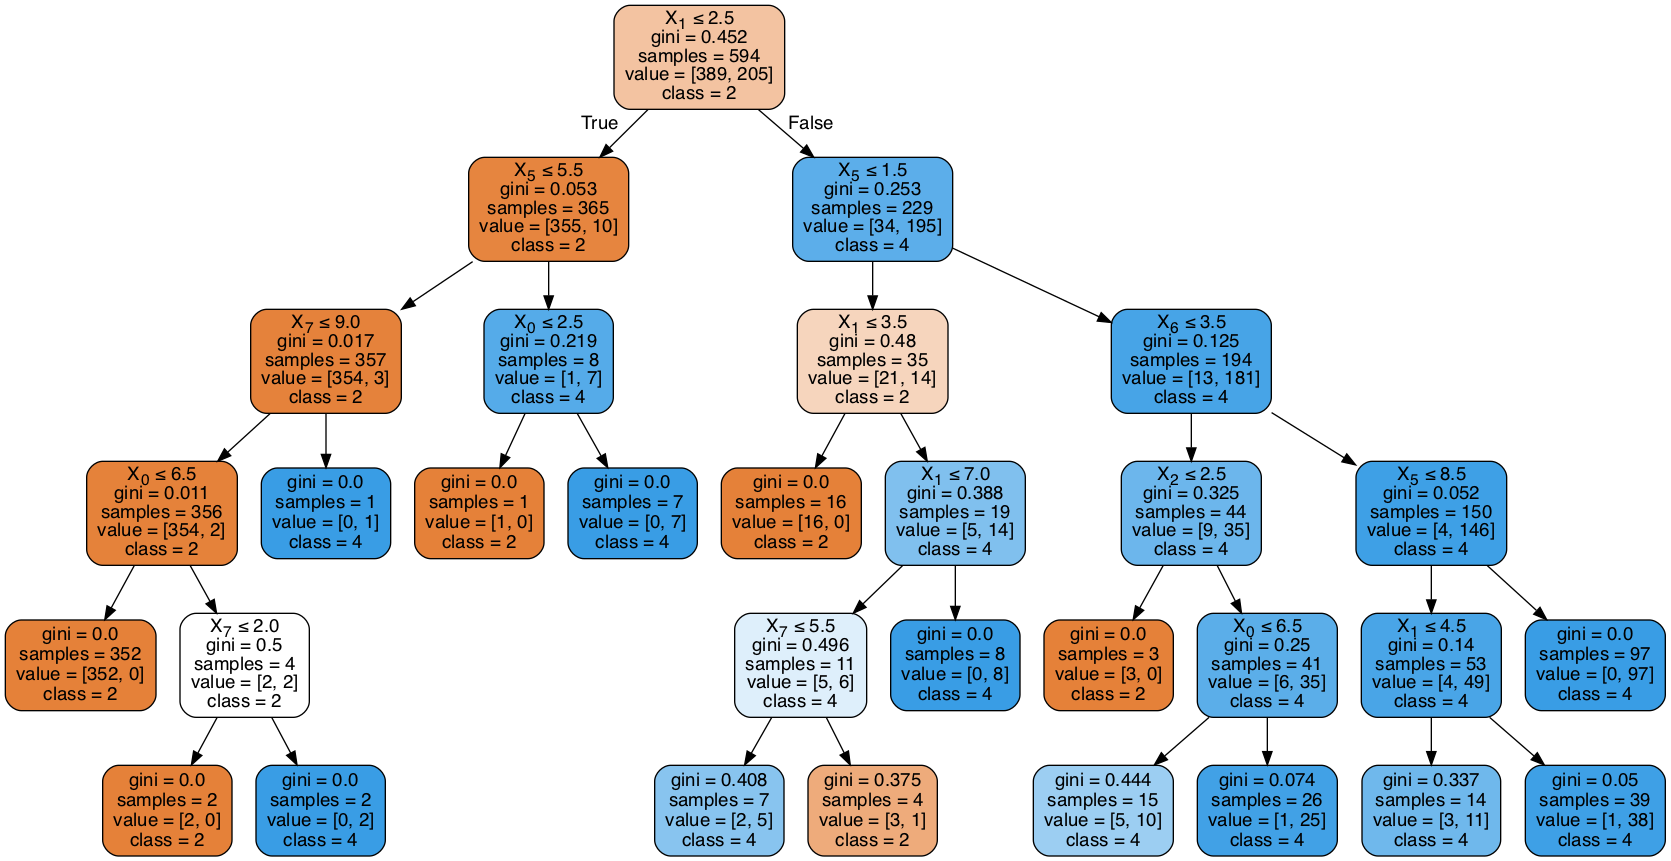

In [15]:
dot_data = StringIO()
export_graphviz(d_tree_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

2. What is boosting, bagging and  stacking?
Which class does random forests belong to and why?

#### Answer

##### Boosting

Boosting is the idea to build simple (weak) decision trees sequentially where each model tries to predict the error left over by the previous model. Each model learns from the mistakes of the previous model. To implement this all the misclassified labels done by the previous model is provided to the next model with an increased weightage. But, this algorithm tends to overfit very quickly. To overcome this we use weaker prediction models. 

##### Bagging

Bagging is used when the goal is to reduce the variance in a decision tree. We create several subsets of data from trianing sample chosen randomly with replacement. Now we train a bunch of models in parallel and each model learns from a random subset of the data. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree. Random forest belongs to bagging. It takes one additional step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. 

##### Stacking

It is very similar to bagging with an additional step. Here we consider many heterogeneous weak models having different parameters. Each model was trained in parallel. The output of these learners is combined by training a meta-model to output a prediction based on the different weak models prediction.

3. Implement random forest algorithm using different decision trees . 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import numpy as np

In [52]:
class my_RandomForestClassifier:
    def __init__(self, max_depth=3, n_trees=100, n_features=None, criterion="gini", min_size=1):
        self.dtrees = []
        self.max_depth = max_depth
        self.n_trees = n_trees
        self.n_features = n_features
        self.criterion = criterion
        self.min_size = min_size
        
        self.init_trees()
    
    def init_trees(self):
        for i in range(self.n_trees):
            self.dtrees.append(DecisionTreeClassifier(criterion=self.criterion, 
                                                      max_depth=self.max_depth, 
                                                      max_features=self.n_features,
                                                      min_samples_leaf=self.min_size
                                                     ))
    def fit(self, X, y):
        for i in range(self.n_trees):
            size = X.shape[0]
            _ids = np.random.randint(size, size=size)
            X_train = X.iloc[_ids]
            y_train = y.iloc[_ids]
            self.dtrees[i].fit(X_train,y_train)
        
    def predict(self, X_test):
        predictions = np.array([]).reshape((X_test.shape[0], 0))
        for i in range(self.n_trees):
            y_pred = self.dtrees[i].predict(X_test)
            predictions = np.c_[predictions, y_pred]
        print(predictions.shape)
        final_y_pred = stats.mode(predictions, axis=1).mode.flatten()
        return final_y_pred
        

In [53]:
r_forest = my_RandomForestClassifier(max_depth=4, n_trees=100, n_features=3, criterion="gini", min_size=1)

r_forest.fit(X_train,y_train)

y_pred = r_forest.predict(X_test)
# print(y_pred.shape, X_test.shape)

print("Gini Forest Accuracy:", metrics.accuracy_score(y_test, y_pred))

(105, 100)
Gini Forest Accuracy: 0.9714285714285714


4. Report the accuracies obtained after using the Random forest algorithm and compare it with the best accuracies obtained with the decision trees. 

- The best accuracies obtained in random forest algorithm is 97.14%
- The best accuracies obtained in decision tree with gini is 94.28%
- The best accuracies obtained in decision tree with entropy is 92.38%

5. Submit your solution as a separate pdf in the final zip file of your submission

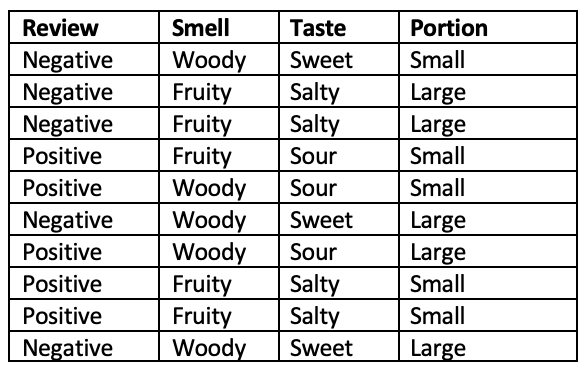

Compute a decision tree with the goal to predict the food review based on its smell, taste and portion size.

(a) Compute the entropy of each rule in the first stage.

(b) Show the final decision tree. Clearly draw it.

Submit a handwritten response. Clearly show all the steps.

